# Exploratory Data Analysis(EDA)

## 1.Basic Terminology

### Dataset: Haberman

### Dataset description:It has Age, year, Nodes and Status features. Status 1 denotes the person has survived the treatment and status 0 denotes the person has not survived the treatment.

### Goal: Do EDA and find the relationship between the features. Plot various graphs to observe the data and arrive at a conclusion.

#### Load the dataset

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

warnings.filterwarnings('ignore')

dataset = pd.read_csv('haberman.csv')

In [15]:
dataset.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


## 2.Check the dataset balance

In [19]:
dataset.status.value_counts()

1    225
2     81
Name: status, dtype: int64

### Observation: Dataset is imbalanced

## 3.check the missing values

In [20]:
dataset.isnull().sum()

age       0
year      0
nodes     0
status    0
dtype: int64

### observation: No missing values in any features

## 4.Bivariate analysis

## 2-D scatter plot: Age vs Year

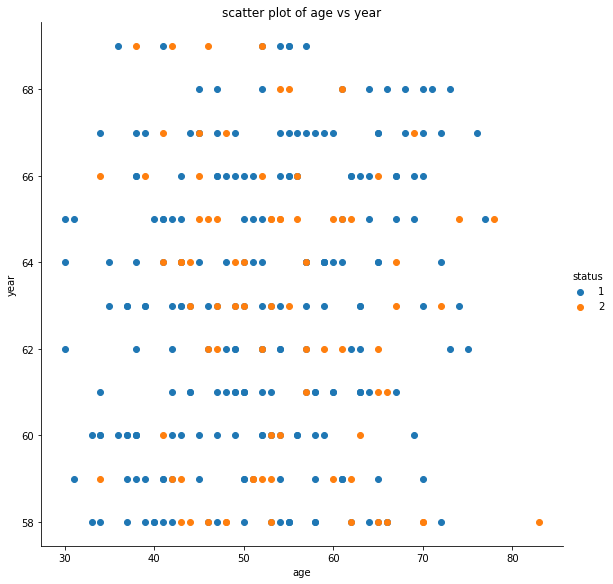

In [26]:
sns.FacetGrid(dataset, hue = 'status', height = 8).map(plt.scatter,'age','year').add_legend()
plt.title('scatter plot of age vs year')
plt.show()

### Observation: No pattern identified between age and year

## 2D-scatter plot: Node vs year

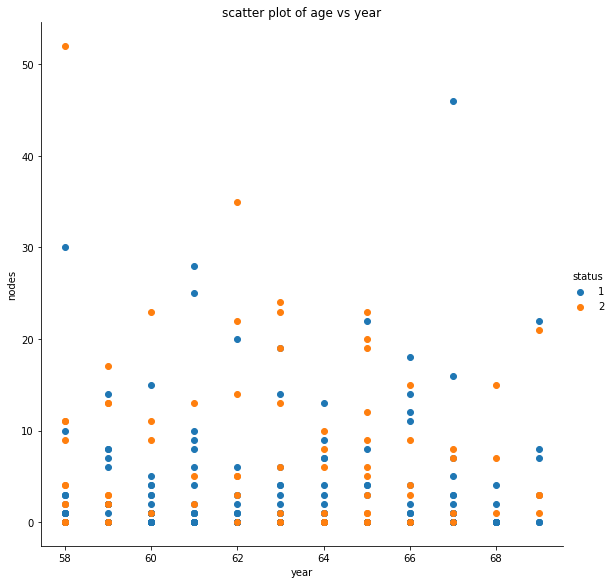

In [29]:
sns.FacetGrid(dataset, hue = 'status', height = 8).map(plt.scatter, 'year','nodes').add_legend()
plt.title('scatter plot of age vs year')
plt.show()

### Observation: No pattern identified between year and nodes

## 2-D scatter: Age vs Nodes

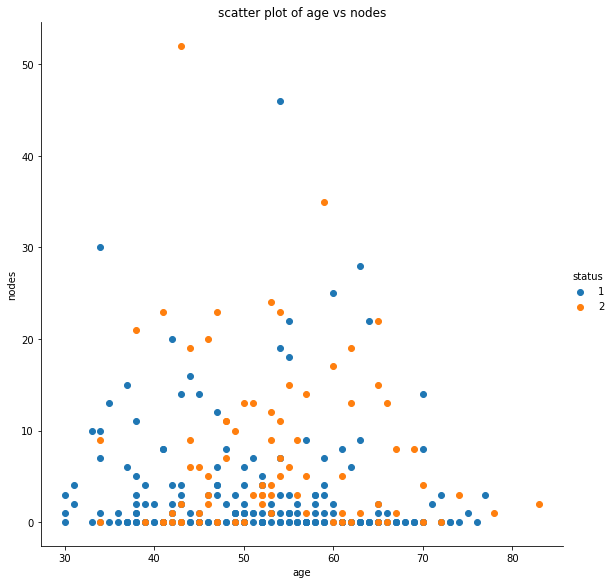

In [30]:
sns.FacetGrid(dataset, hue = 'status', height = 8).map(plt.scatter, 'age', 'nodes').add_legend()
plt.title('scatter plot of age vs nodes')
plt.show()

### Observation: More number of survived patients when the age group is less than 40.

## 5.Pair plot

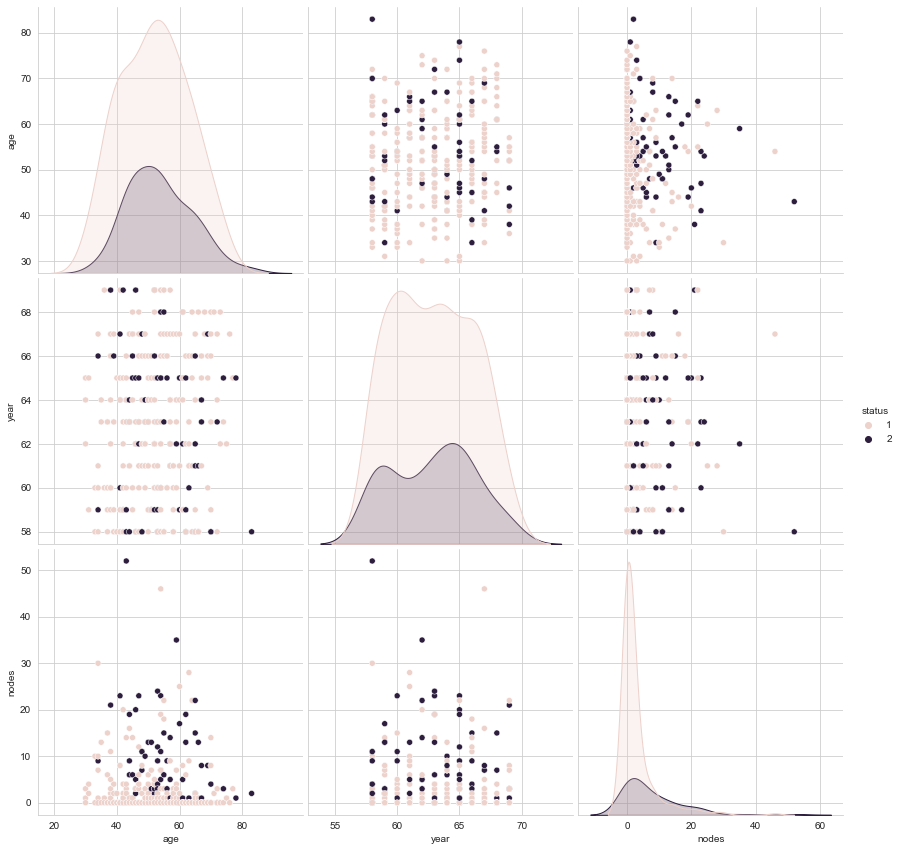

In [36]:
plt.close()
sns.pairplot(dataset, hue = 'status', height = 4)
plt.show()

### Observation:
### 1. Age and year are overlapped
### 2. Degree of overlap is minium in nodes. so let's use 1D scatter plot on nodes

## 6.1D scatter plot on nodes:

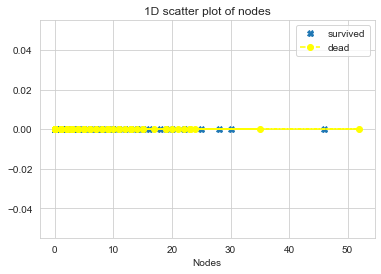

In [58]:
dataset_survived = dataset.loc[dataset['status']==1]
dataset_dead = dataset.loc[dataset['status']==2]

plt.plot(dataset_survived['nodes'],np.zeros_like(dataset_survived['nodes']),'X',label = 'survived')
plt.plot(dataset_dead['nodes'],np.zeros_like(dataset_dead['nodes']),color='yellow', marker='o', linestyle='dashed',label = 'dead')
plt.title('1D scatter plot of nodes')
plt.xlabel('Nodes')
plt.legend()
plt.show()


In [48]:
dataset.status.value_counts()

1    225
2     81
Name: status, dtype: int64

### Observation: Patients die when their nodes are greater than 30

## 7.Histogram

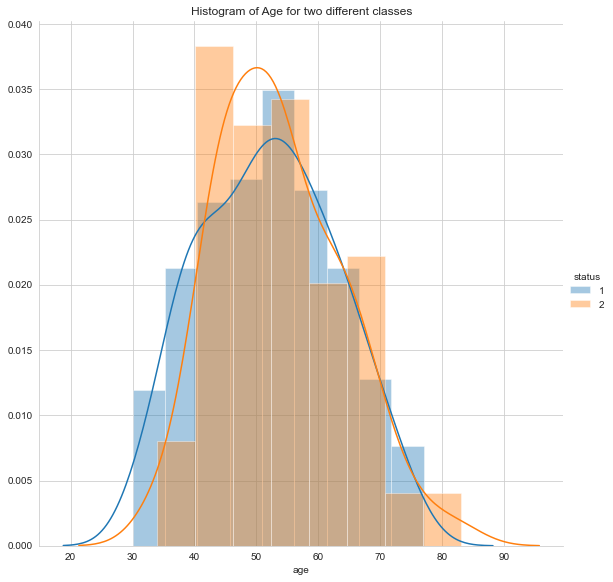

In [60]:
sns.FacetGrid(dataset, hue = 'status', height = 8).map(sns.distplot, 'age').add_legend()
plt.title('Histogram of Age for survived(1) and dead(2)')
plt.show()

### Observation: Two classes overlap for Age,so no pattern identified

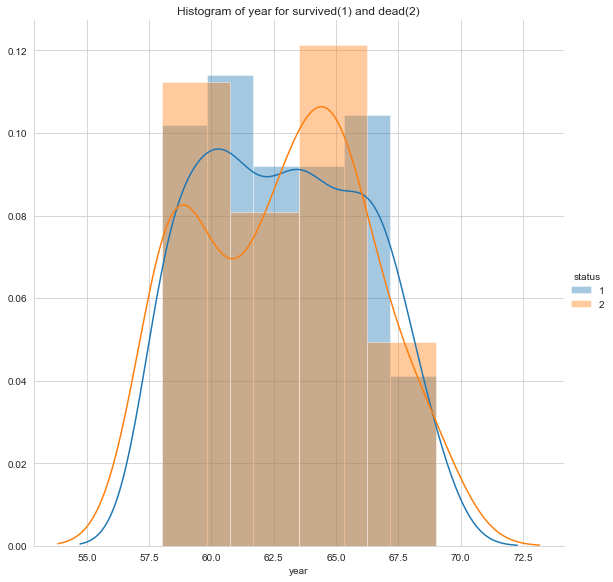

In [61]:
sns.FacetGrid(dataset, hue = 'status', height = 8).map(sns.distplot, 'year').add_legend()
plt.title('Histogram of year for survived(1) and dead(2)')
plt.show()

### Observation: Two classes overlap for year, so no pattern identified

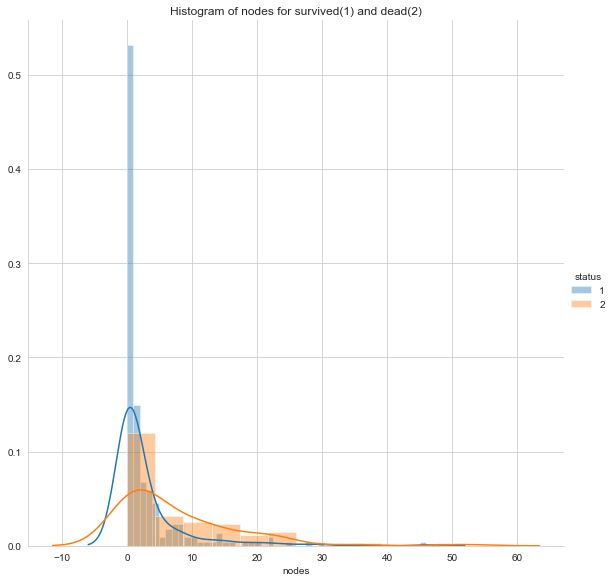

In [62]:
sns.FacetGrid(dataset, hue = 'status', height = 8).map(sns.distplot, 'nodes').add_legend()
plt.title('Histogram of nodes for survived(1) and dead(2)')
plt.show()

### Observation: Patients having nodes 30+ likely to die. We will see the probability of nodes more in CDF

## 8.CDF

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


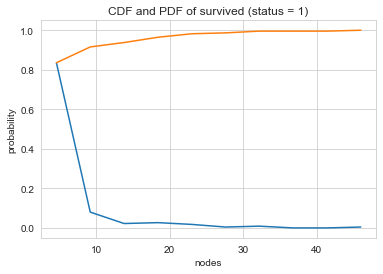

In [73]:
counts, bin_edges = np.histogram(dataset_survived['nodes'], bins = 10, density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

print(pdf)
print(bin_edges)
plt.plot(bin_edges[1:],pdf, label = 'pdf-10 bins')
plt.plot(bin_edges[1:],cdf, label = 'cdf')

plt.xlabel('nodes')
plt.ylabel('probability')
plt.title('CDF and PDF of survived (status = 1)')
plt.show()

### Observation: 82% chance of survival when node is less than 5

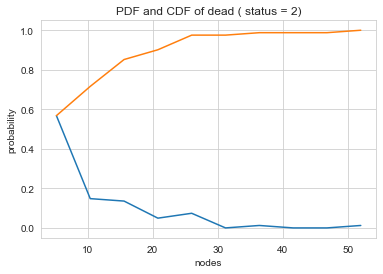

In [72]:
count, bin_edges = np.histogram(dataset_dead['nodes'], bins = 10, density = True)
pdf = count/sum(count)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf, label = 'pdf-10 bins')
plt.plot(bin_edges[1:], cdf, label = 'CDF')

plt.title('PDF and CDF of dead ( status = 2)')
plt.xlabel('nodes')
plt.ylabel('probability')
plt.show()

### Observation: 58% chance of dead when nodes are less than 5

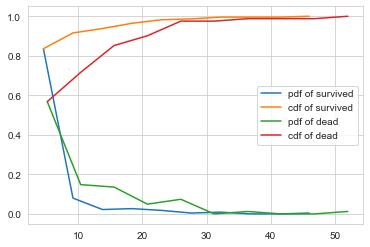

In [76]:
count, bin_edges = np.histogram(dataset_survived['nodes'],bins = 10, density = True)
pdf = count/sum(count)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label = 'pdf of survived')
plt.plot(bin_edges[1:], cdf, label = 'cdf of survived')

count, bin_edges = np.histogram(dataset_dead['nodes'], bins = 10, density = True)
pdf = count/sum(count)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf, label = 'pdf of dead')
plt.plot(bin_edges[1:],cdf, label = 'cdf of dead')

plt.legend()
plt.show()

### Observation: From the graph of CDF and PDF, it is evident that 82% chance of survival when node is less than 5 where as 58% of dead when node is less than 6.

## 10.Mean, Std deviaiton, Median, Quantile, 90th percentile, MAD for individual classes

In [81]:
mean_survived = np.mean(dataset_survived['nodes'])
mean_dead = np.mean(dataset_dead['nodes'])
std_survived = np.std(dataset_survived['nodes'])
std_dead = np.std(dataset_dead['nodes'])
median_survived = np.median(dataset_survived['nodes'])
median_dead = np.median(dataset_dead['nodes'])
quantile_survived = np.percentile(dataset_survived['nodes'], np.arange(0,100,25))
quantile_dead = np.percentile(dataset_dead['nodes'], np.arange(0,100,25))
percentile_survived = np.percentile(dataset_survived['nodes'],90)
percentile_dead = np.percentile(dataset_dead['nodes'],90)
from statsmodels import robust
mad_survived = robust.mad(dataset_survived['nodes'])
mad_dead = robust.mad(dataset_dead['nodes'])

print('Mean of survived and dead')
print(mean_survived)
print(mean_dead)

print('\nStd of survived and dead')
print(std_survived)
print(std_dead)

print('\nMedian of survived and dead')
print(median_survived)
print(median_dead)

print('\nQuantile of survived and dead')
print(quantile_survived)
print(quantile_dead)

print('\n90th percentile of survived and dead')
print(percentile_survived)
print(percentile_dead)

print('\nMAD of survived and dead')
print(mad_survived)
print(mad_dead)

Mean of survived and dead
2.7911111111111113
7.45679012345679

Std of survived and dead
5.857258449412131
9.128776076761632

Median of survived and dead
0.0
4.0

Quantile of survived and dead
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th percentile of survived and dead
8.0
20.0

MAD of survived and dead
0.0
5.930408874022408


## 11.Box plot and Whiskers

Text(0.5, 1.0, 'Box plot of nodes for both survived and dead')

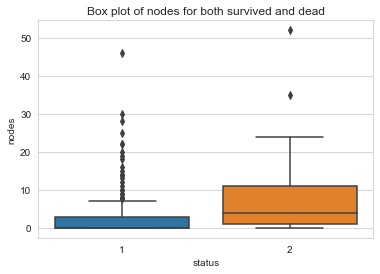

In [84]:
sns.boxplot(x = 'status', y = 'nodes', data = dataset)
plt.title('Box plot of nodes for both survived and dead')

## 12.Violin plot

Text(0.5, 1.0, 'Violin plto of nodes for both survived and dead')

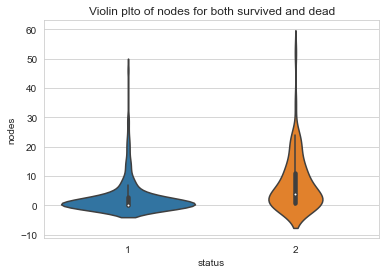

In [85]:
sns.violinplot(x = 'status', y = 'nodes', data = dataset)
plt.title('Violin plto of nodes for both survived and dead')

### Conclusion
### 1. Highly imbalanced dataset. 
### 2. Cannot predict the survival/dead pattern with the features Age and year.
### 3. People who survived has dense nodes less than 5.
### 4. People who died has dense nodes between 11 and 2